# Exploratory Data Analysis (EDA) of Air Pollution in Skopje, Macedonia


## Project Overview:
Here we have air pollution data for the city Bojan currently lives in - Skopje, Macedonia.
The measurements go back ~10 years and include  6 measuring stations (A, B, C, D, E, G). The measurements are taken every hour but there is a lot of missing data and some station are active just since the last few years.
Higher ratings mean worse air quality.
Anything over 50 is considered not good. Anything over 200 is considered hazardous.

Let's try to answer the following questions for the last 5 winters, a winter being the period from November including February. We are looking at the years 2013/14 until 2017/18.
1. Which have been the top 3 worst months overall?
2. Which measuring station has the highest ratings on average?
3. Make a pie chart with the average rating for each station
4. Which is the worst month per measuring station on average? Is it the same for them all?
5. Make a horizontal bar chart showing how many days in total the measurements have been over 50 for each. 
6. Same chart for over 200.

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [8]:
# Data viz style
import seaborn as sns
plt.style.use('seaborn-deep')
%matplotlib inline

## 1. Data Cleaning:

### Import the data

In [9]:
data = pd.read_csv("pm10_data.csv", parse_dates=True)

### Examine the data

In [10]:
data.head()

,A,B,C,D,E,G,time
0,NaN,NaN,NaN,NaN,NaN,120.26,2008-01-01 00:00:00
1,NaN,NaN,124.84,99.12,NaN,130.95,2008-01-01 01:00:00
2,NaN,NaN,107.64,98.37,NaN,130.19,2008-01-01 02:00:00
3,NaN,NaN,107.80,89.33,NaN,121.46,2008-01-01 03:00:00
4,NaN,NaN,100.65,94.35,NaN,103.99,2008-01-01 04:00:00


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92246 entries, 0 to 92245
Data columns (total 7 columns):
A       55670 non-null float64
B       50826 non-null float64
C       64273 non-null float64
D       82896 non-null float64
E       65715 non-null float64
G       76992 non-null float64
time    92246 non-null object
dtypes: float64(6), object(1)
memory usage: 4.9+ MB


#### Convert date to datetime format and make it the index

In [12]:
# Rename column from time to date
data=data.rename(columns = {'time':'date'})

In [13]:
data.date.dtype

dtype('O')

In [14]:
# convert it to datetime format
data['date'] = pd.to_datetime(data['date'])

In [15]:
data.date.dtype

dtype('<M8[ns]')

In [16]:
# make the date the index
data.set_index('date', inplace=True)

In [17]:
data.head()

,A,B,C,D,E,G
date,,,,,,
2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,120.26
2008-01-01 01:00:00,NaN,NaN,124.84,99.12,NaN,130.95
2008-01-01 02:00:00,NaN,NaN,107.64,98.37,NaN,130.19
2008-01-01 03:00:00,NaN,NaN,107.80,89.33,NaN,121.46
2008-01-01 04:00:00,NaN,NaN,100.65,94.35,NaN,103.99


#### Create a new column that gets the combined average for all 6 stations

In [18]:
data['Combined'] = data.mean(axis=1)
data.head()

,A,B,C,D,E,G,Combined
date,,,,,,,
2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,120.26,120.260000
2008-01-01 01:00:00,NaN,NaN,124.84,99.12,NaN,130.95,118.303333
2008-01-01 02:00:00,NaN,NaN,107.64,98.37,NaN,130.19,112.066667
2008-01-01 03:00:00,NaN,NaN,107.80,89.33,NaN,121.46,106.196667
2008-01-01 04:00:00,NaN,NaN,100.65,94.35,NaN,103.99,99.663333


#### Get rid of any rows with no data at all (combined = NaN)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92246 entries, 2008-01-01 00:00:00 to 2018-03-09 23:00:00
Data columns (total 7 columns):
A           55670 non-null float64
B           50826 non-null float64
C           64273 non-null float64
D           82896 non-null float64
E           65715 non-null float64
G           76992 non-null float64
Combined    91739 non-null float64
dtypes: float64(7)
memory usage: 5.6 MB


In [20]:
# count of null rows in Combined
data['Combined'].isna().sum()

507

In [21]:
# percent of total
data['Combined'].isna().sum() / len(data.index) * 100

0.5496173275805997

In [22]:
# drop em
data = data.dropna(subset=['Combined'])

In [23]:
# count of null rows
data['Combined'].isna().sum()

0

### Aggregate the data into timeframes needed for this project

In [24]:
# Aggregate by month

data_monthly = data.resample('M').mean()
data_monthly.head()

,A,B,C,D,E,G,Combined
date,,,,,,,
2008-01-31,NaN,NaN,128.427210,183.496871,NaN,165.894295,159.292806
2008-02-29,NaN,NaN,103.447677,152.298737,NaN,126.949795,127.948333
2008-03-31,77.520488,NaN,61.652862,79.710671,NaN,82.297210,77.021969
2008-04-30,76.780893,NaN,55.808413,65.226590,NaN,73.776319,67.403371
2008-05-31,NaN,NaN,52.928713,65.947887,NaN,61.131588,58.965734


In [25]:
# Isolate the winter months (Nov up to and including Feb aka Month>=11 or Month<=2)

data_winter = data_monthly[(data_monthly.index.month>=11) | (data_monthly.index.month<=2)]
data_winter.head()

,A,B,C,D,E,G,Combined
date,,,,,,,
2008-01-31,NaN,NaN,128.427210,183.496871,NaN,165.894295,159.292806
2008-02-29,NaN,NaN,103.447677,152.298737,NaN,126.949795,127.948333
2008-11-30,NaN,NaN,110.575986,146.269852,NaN,123.912886,119.940945
2008-12-31,NaN,NaN,NaN,76.933954,NaN,84.076260,83.971495
2009-01-31,NaN,31.469352,NaN,214.988354,107.690344,183.968351,167.881782


In [26]:
# Now isolate the months in last 5 years 2013-2018

data_winter5 = data_winter.loc['2013-11-01':]
data_winter5.head()

,A,B,C,D,E,G,Combined
date,,,,,,,
2013-11-30,89.210520,NaN,81.953826,114.531322,89.774976,85.086290,91.077384
2013-12-31,239.218055,NaN,224.384521,268.355553,64.055559,225.901599,235.008227
2014-01-31,146.111663,NaN,150.320490,175.853822,118.568895,162.285420,151.860986
2014-02-28,95.790830,NaN,87.854985,140.922765,69.164844,94.938952,100.594222
2014-11-30,81.748573,100.730746,77.421342,119.479688,54.450319,81.120024,84.948160


## 2. Exploratory Data Analysis

#### Ex 1. Which have been the top 3 worst months overall?

In [27]:
# These are the worst 3 months overall
data_monthly['Combined'].sort_values(ascending=False).head(3)

date
2013-12-31    235.008227
2011-11-30    211.661886
2012-12-31    209.454450
Name: Combined, dtype: float64

In [28]:
# These are the worst 3 months looking at all winter months (same as worst overall)
data_winter['Combined'].sort_values(ascending=False).head(3)

date
2013-12-31    235.008227
2011-11-30    211.661886
2012-12-31    209.454450
Name: Combined, dtype: float64

In [29]:
# These are the worst 3 winter months within the last 5 years
data_winter5['Combined'].sort_values(ascending=False).head(3)

date
2013-12-31    235.008227
2017-01-31    184.772162
2015-01-31    169.032881
Name: Combined, dtype: float64

**Answer:**  
1. Dec 2013
2. Jan 2017
3. Jan 2015

#### Ex 2. Which measuring station has the highest ratings on average?

In [30]:
# Average when looking at all data
data.mean().sort_values(ascending=False)

D           94.647895
B           80.485886
G           76.967020
Combined    76.412897
A           72.715512
C           67.513649
E           50.960180
dtype: float64

In [31]:
# Average when looking at all monthly data
data_monthly.mean().sort_values(ascending=False)

D           95.469708
B           81.059289
G           77.834788
Combined    76.626735
A           71.465676
C           67.914770
E           51.792864
dtype: float64

In [32]:
# Average when looking at winter months only
data_winter.mean().sort_values(ascending=False)

D           170.302129
G           127.195559
Combined    127.100217
B           126.961979
A           120.755954
C           113.991342
E            78.943114
dtype: float64

In [33]:
# Average when looking at winter months in the last 5 years
data_winter5.mean().sort_values(ascending=False)

D           157.247817
G           128.146407
B           127.899214
Combined    122.074543
A           115.337031
C           111.566471
E            76.167982
dtype: float64

**Answer:**  
Station D with 157.25 avg rating in winter months over the last 5 years

#### Ex 3. Make a pie chart with the average rating for each station

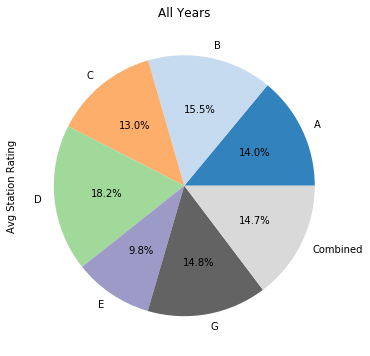

In [34]:
# Using all data
data.mean().plot.pie(y='columns', title='All Years', label='Avg Station Rating', autopct='%1.1f%%', colormap='tab20c', figsize=(6,6))

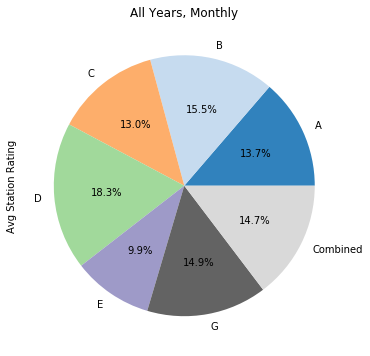

In [35]:
# Using monthly data for all years
data_monthly.mean().plot.pie(y='columns', title='All Years, Monthly', label='Avg Station Rating', autopct='%1.1f%%', colormap='tab20c', figsize=(6,6))

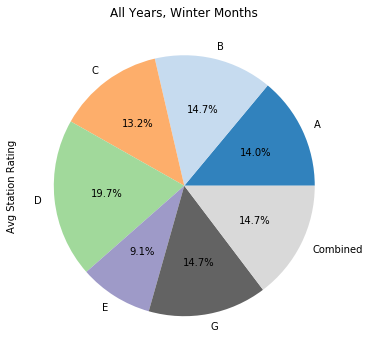

In [36]:
# Using winter month data for all years
data_winter.mean().plot.pie(y='columns', title='All Years, Winter Months', label='Avg Station Rating', autopct='%1.1f%%', colormap='tab20c', figsize=(6,6))

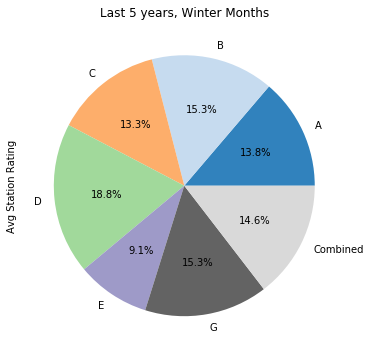

In [37]:
# Using winter month data for the last 5 years
data_winter5.mean().plot.pie(y='columns', title='Last 5 years, Winter Months', label='Avg Station Rating', autopct='%1.1f%%', colormap='tab20c', figsize=(6,6))

#### Ex 4. Which is the worst month per measuring station on average? Is it the same for them all?

Starting with worst individual months.  
Looking only at the last 5 years, winter months for expediency

In [38]:
print(f"The worst individual month for Station A was {data_winter5['A'].idxmax().strftime('%b %Y')} with a reading of {round( (data_winter5['A'].max() ), 2)}")
print(f"The worst individual month for Station B was {data_winter5['B'].idxmax().strftime('%b %Y')} with a reading of {round( (data_winter5['B'].max() ), 2)}")
print(f"The worst individual month for Station C was {data_winter5['C'].idxmax().strftime('%b %Y')} with a reading of {round( (data_winter5['C'].max() ), 2)}")
print(f"The worst individual month for Station D was {data_winter5['D'].idxmax().strftime('%b %Y')} with a reading of {round( (data_winter5['D'].max() ), 2)}")
print(f"The worst individual month for Station E was {data_winter5['E'].idxmax().strftime('%b %Y')} with a reading of {round( (data_winter5['E'].max() ), 2)}")
print(f"The worst individual month for Station G was {data_winter5['G'].idxmax().strftime('%b %Y')} with a reading of {round( (data_winter5['G'].max() ), 2)}")
print(f"The worst individual month for Combined Stations was {data_winter5['Combined'].idxmax().strftime('%b %Y')} with a reading of {round( (data_winter5['Combined'].max() ), 2)}")

The worst individual month for Station A was Dec 2013 with a reading of 239.22
The worst individual month for Station B was Jan 2015 with a reading of 213.71
The worst individual month for Station C was Dec 2013 with a reading of 224.38
The worst individual month for Station D was Dec 2013 with a reading of 268.36
The worst individual month for Station E was Jan 2017 with a reading of 158.09
The worst individual month for Station G was Dec 2013 with a reading of 225.9
The worst individual month for Combined Stations was Dec 2013 with a reading of 235.01


Now get the month of the year with the worst readings.  
Looking only at the last 5 years, winter months for expediency

In [39]:
nov = data_winter5[data_winter5.index.month==11].mean().to_frame()
dec = data_winter5[data_winter5.index.month==12].mean().to_frame()
jan = data_winter5[data_winter5.index.month==1].mean().to_frame()
feb = data_winter5[data_winter5.index.month==2].mean().to_frame()

nov

,0
A,87.040590
B,95.729094
C,85.740320
D,119.991002
E,68.293894
G,93.655599
Combined,91.240646


In [40]:
nov.columns=['Nov']
dec.columns=['Dec']
jan.columns=['Jan']
feb.columns=['Feb']

nov

,Nov
A,87.040590
B,95.729094
C,85.740320
D,119.991002
E,68.293894
G,93.655599
Combined,91.240646


In [41]:
station_months = pd.concat([nov, dec, jan, feb], axis=1)
station_months

,Nov,Dec,Jan,Feb
A,87.040590,155.864304,140.461512,77.981719
B,95.729094,149.886334,173.939650,92.041780
C,85.740320,149.282768,130.067689,81.175107
D,119.991002,204.941941,190.404272,113.654051
E,68.293894,74.672939,104.578123,57.126971
G,93.655599,163.050660,161.255088,94.624282
Combined,91.240646,158.998744,150.681936,87.376846


Now I can get the worst month out of the year for each station.  
**Answer:**  

In [42]:
print(f"The worst month of the year for Station A is {station_months.loc['A'].idxmax()} with a reading of {round( (station_months.loc['A'].max() ), 2)}")
print(f"The worst month of the year for Station B is {station_months.loc['B'].idxmax()} with a reading of {round( (station_months.loc['B'].max() ), 2)}")
print(f"The worst month of the year for Station C is {station_months.loc['C'].idxmax()} with a reading of {round( (station_months.loc['C'].max() ), 2)}")
print(f"The worst month of the year for Station D is {station_months.loc['D'].idxmax()} with a reading of {round( (station_months.loc['D'].max() ), 2)}")
print(f"The worst month of the year for Station E is {station_months.loc['E'].idxmax()} with a reading of {round( (station_months.loc['E'].max() ), 2)}")
print(f"The worst month of the year for Station G is {station_months.loc['G'].idxmax()} with a reading of {round( (station_months.loc['G'].max() ), 2)}")
print(f"The worst month of the year for Combined Stations is {station_months.loc['Combined'].idxmax()} with a reading of {round( (station_months.loc['Combined'].max() ), 2)}")

The worst month of the year for Station A is Dec with a reading of 155.86
The worst month of the year for Station B is Jan with a reading of 173.94
The worst month of the year for Station C is Dec with a reading of 149.28
The worst month of the year for Station D is Dec with a reading of 204.94
The worst month of the year for Station E is Jan with a reading of 104.58
The worst month of the year for Station G is Dec with a reading of 163.05
The worst month of the year for Combined Stations is Dec with a reading of 159.0


#### Ex 5. Make a horizontal bar chart showing how many *DAYS* in total the measurements have been over 50 for each.

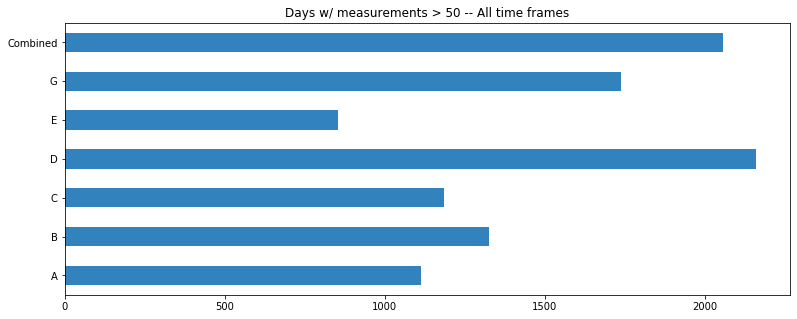

In [43]:
# All time frames
data_daily = data.resample('D').mean()
(data_daily>=50).sum().plot.barh(title='Days w/ measurements > 50 -- All time frames', colormap='tab20c', figsize=(13,5))

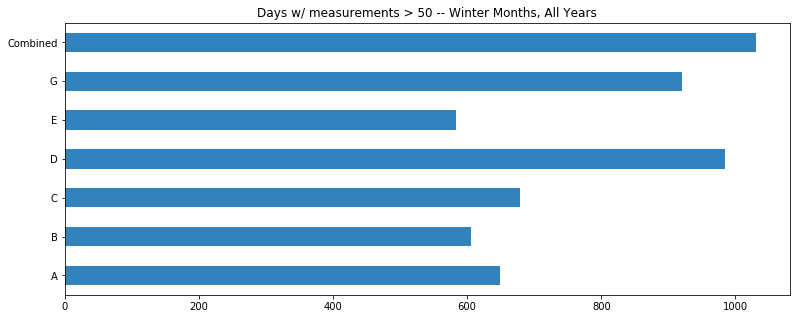

In [44]:
# Winter Months, all years
winter_daily = data_daily[(data_daily.index.month>=11) | (data_daily.index.month<=2)]
(winter_daily>=50).sum().plot.barh(title='Days w/ measurements > 50 -- Winter Months, All Years', colormap='tab20c', figsize=(13,5))

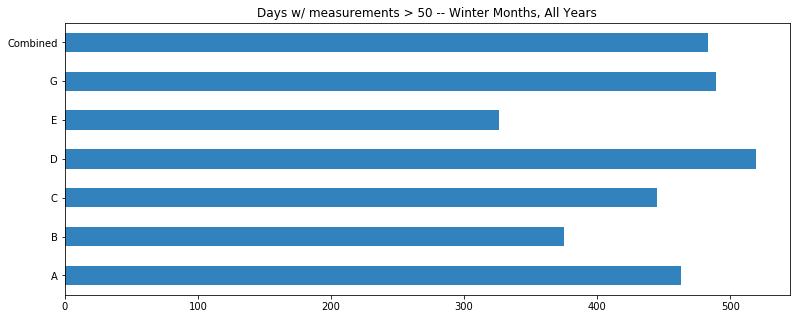

In [45]:
# Winter Months in last 5 years
winter_daily5 = winter_daily['2013-11-01':]
(winter_daily5>=50).sum().plot.barh(title='Days w/ measurements > 50 -- Winter Months, All Years', colormap='tab20c', figsize=(13,5))

#### Ex 6. Same chart for over 200

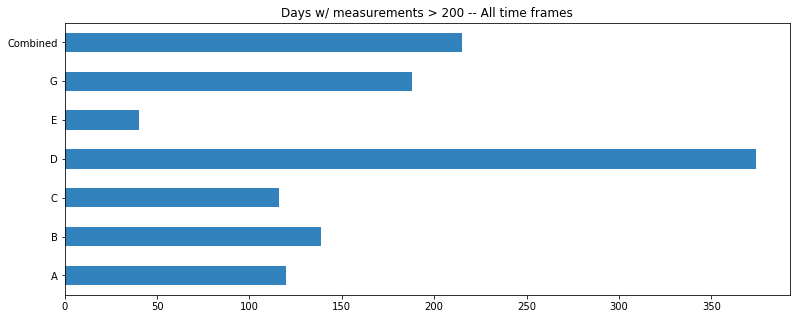

In [46]:
# All time frames
(data_daily>=200).sum().plot.barh(title='Days w/ measurements > 200 -- All time frames', colormap='tab20c', figsize=(13,5))

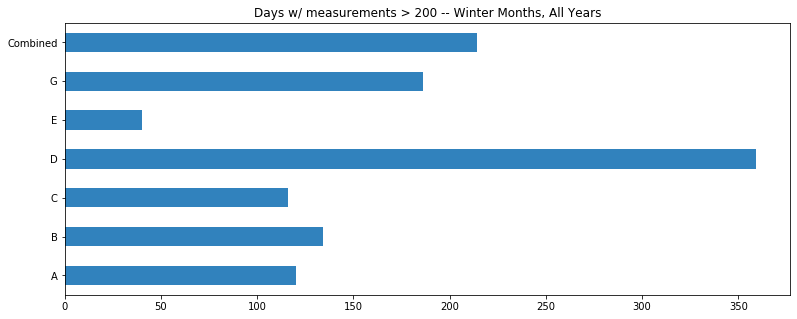

In [47]:
# Winter Months, all years
(winter_daily>=200).sum().plot.barh(title='Days w/ measurements > 200 -- Winter Months, All Years', colormap='tab20c', figsize=(13,5))

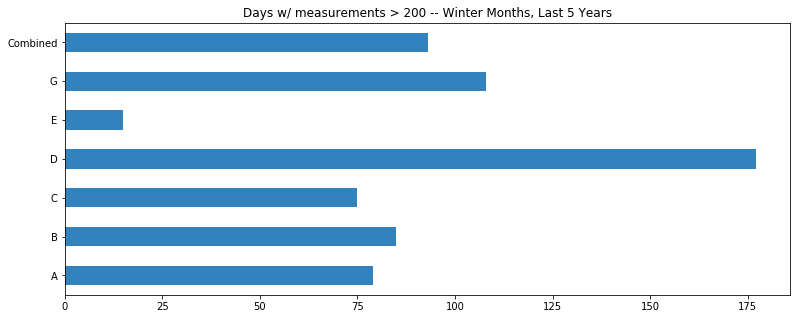

In [51]:
# Winter Months in last 5 years
(winter_daily5>=200).sum().plot.barh(title='Days w/ measurements > 200 -- Winter Months, Last 5 Years', colormap='tab20c', figsize=(13,5))

### Bonus EDA for fun

#### Line chart of each station over time

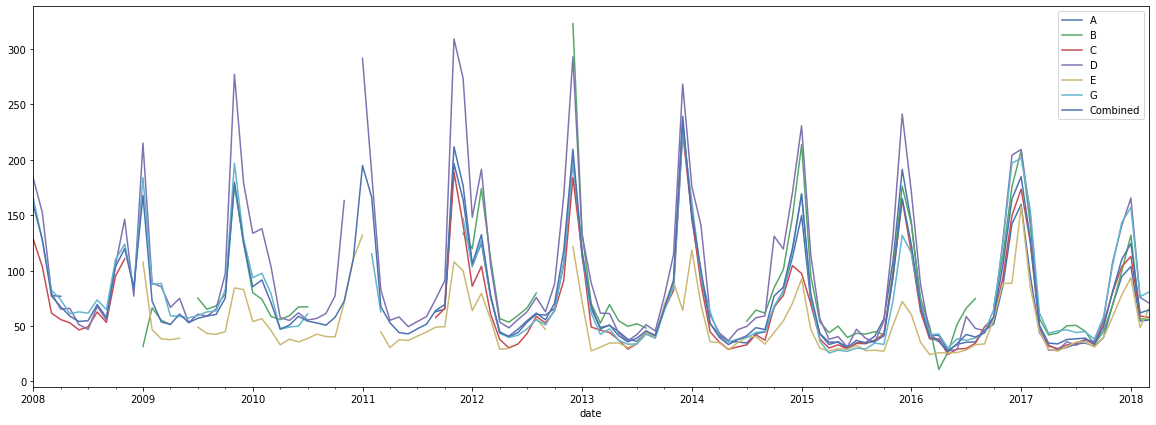

In [49]:
data_monthly = data_monthly.sort_index()
data_monthly.plot(figsize=(20,7))

#### Add rolling averages on the Combined series

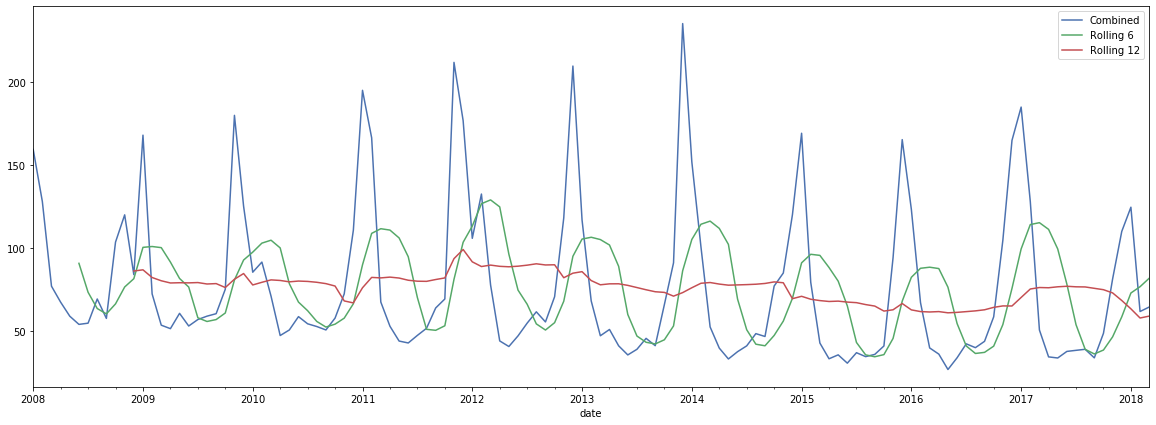

In [50]:
data_monthly['Rolling 6'] = data_monthly['Combined'].rolling(6).mean()
data_monthly['Rolling 12'] = data_monthly['Combined'].rolling(12).mean()
data_monthly[['Combined', 'Rolling 6', 'Rolling 12']].plot(figsize=(20,7))